In [1]:
import umap
import umap.plot
import hdbscan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from top2vec import Top2Vec

In [2]:
def generate_umap_projection(t2v_model, umap_model, num_topic):
    """ Plotting reduced umap projection of the model. 
    
    
    Parameters
    ----------
    t2v_model: top2vec.Top2Vec.Top2Vec
        top2vec model
    umap_model: umap.umap_.UMAP
        umap model
    num_topic: int
        number of topics to reduce to
    """
    t2v_model.hierarchical_topic_reduction(num_topic)
    ax = umap.plot.points(umap_model, labels=t2v_model.doc_top_reduced)
    ax.set_title(f"Reduced 2D embeddings: {num_topic} topics")
    plt.savefig(
        f"./../reports/figures/umap-points-reduced-{num_topic}-topics.png", 
        dpi=300, 
        bbox_inches="tight",
        pad_inches=0.3,
    )

In [3]:
model = Top2Vec.load("./../models/210205 - top2vec.model")

In [4]:
umap_args = {
    "n_neighbors": 15,
    "n_components": 2, # plotting is currently only implemented for 2d embeddings
    "metric": "cosine",
    "random_state": 42,
}
umap_model = umap.UMAP(**umap_args).fit(model._get_document_vectors(norm=False))

## Reproducibility

In [5]:
d = {}
for iteration in range(5):
    model = Top2Vec.load("./../models/210205 - top2vec.model")
    d[iteration] = model.hierarchical_topic_reduction(20)

In [6]:
# visually checking if topic reduction is consistent
for k in d.keys():
    print(d[k][0])

[209, 211, 74, 203, 189, 19, 9, 94, 61, 164, 75, 57, 126, 136, 138, 155, 161, 4]
[209, 211, 74, 203, 189, 19, 9, 94, 61, 164, 75, 57, 126, 136, 138, 155, 161, 4]
[209, 211, 74, 203, 189, 19, 9, 94, 61, 164, 75, 57, 126, 136, 138, 155, 161, 4]
[209, 211, 74, 203, 189, 19, 9, 94, 61, 164, 75, 57, 126, 136, 138, 155, 161, 4]
[209, 211, 74, 203, 189, 19, 9, 94, 61, 164, 75, 57, 126, 136, 138, 155, 161, 4]


## Vizzes

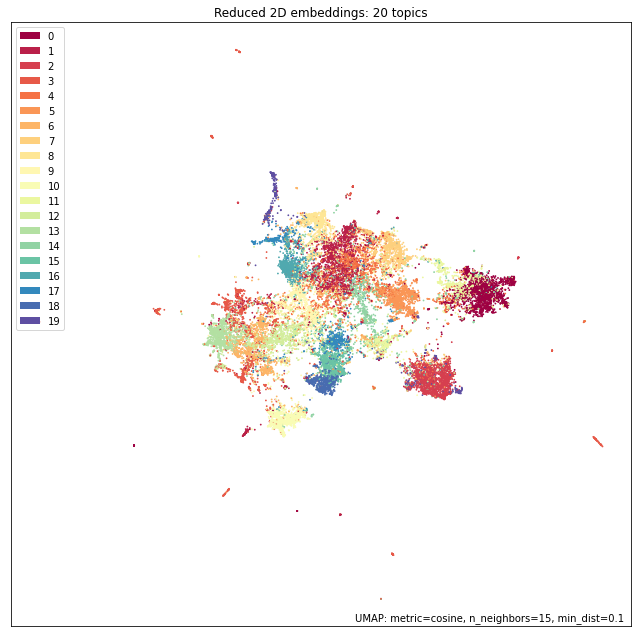

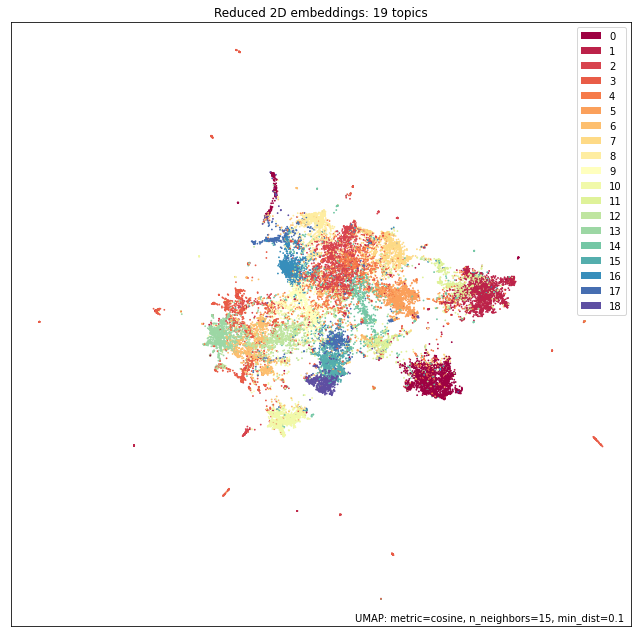

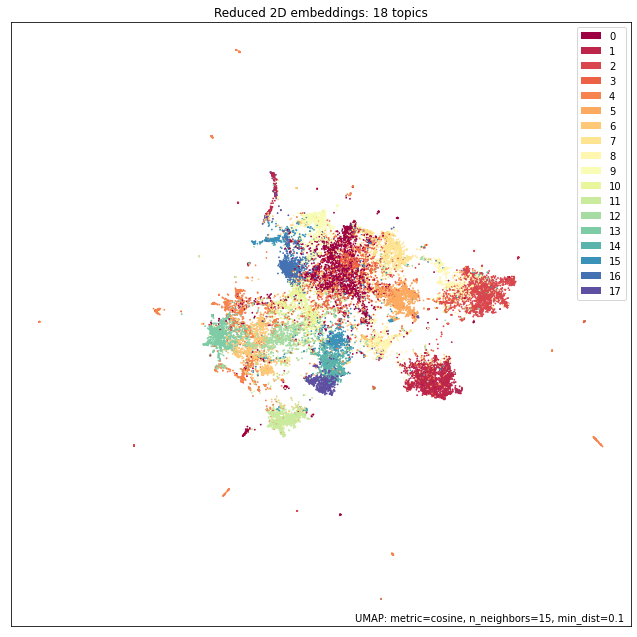

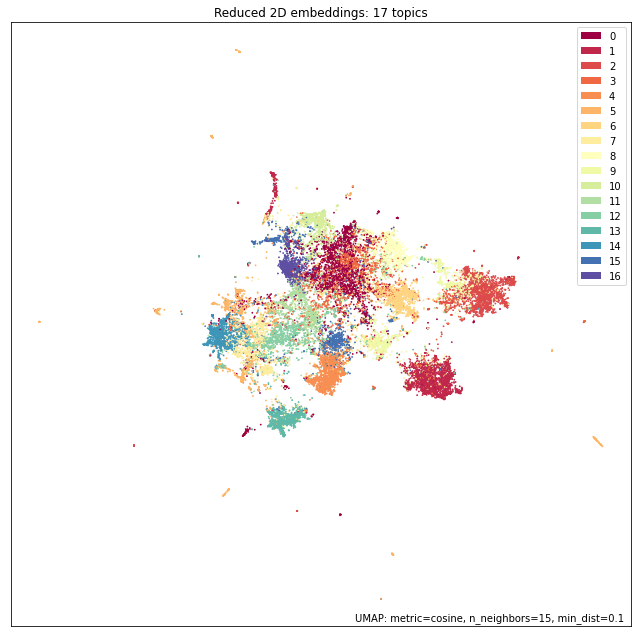

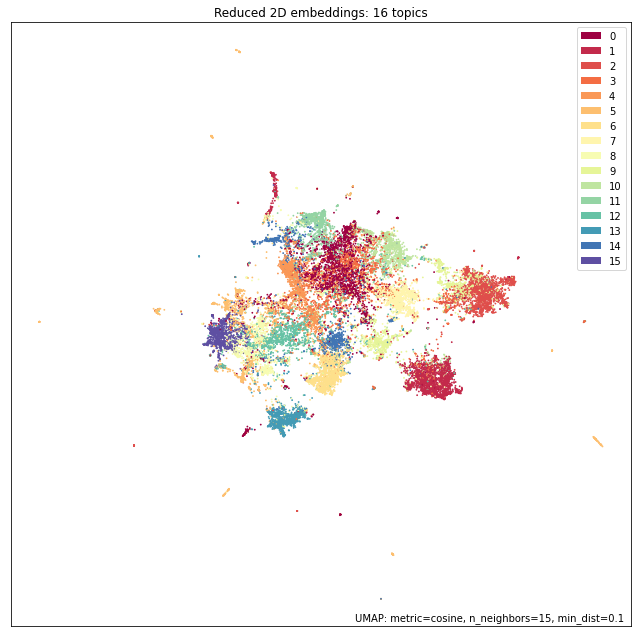

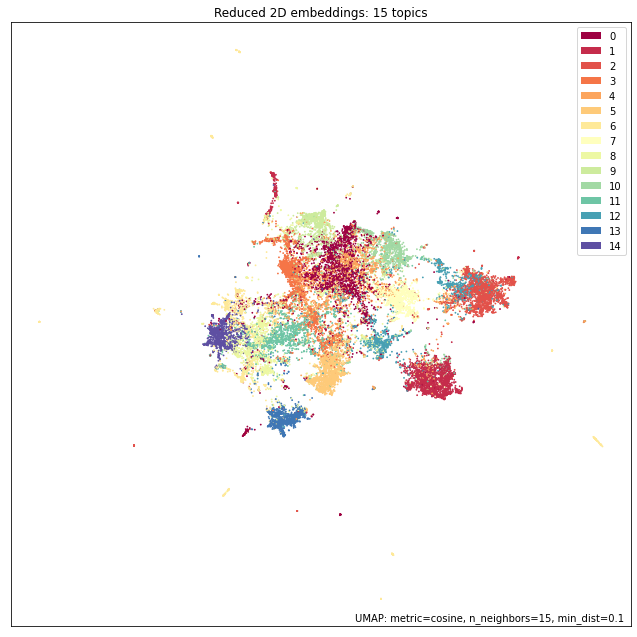

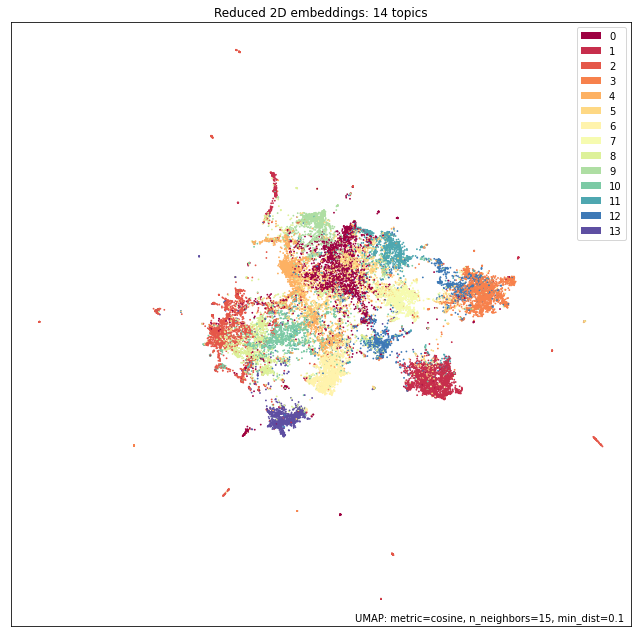

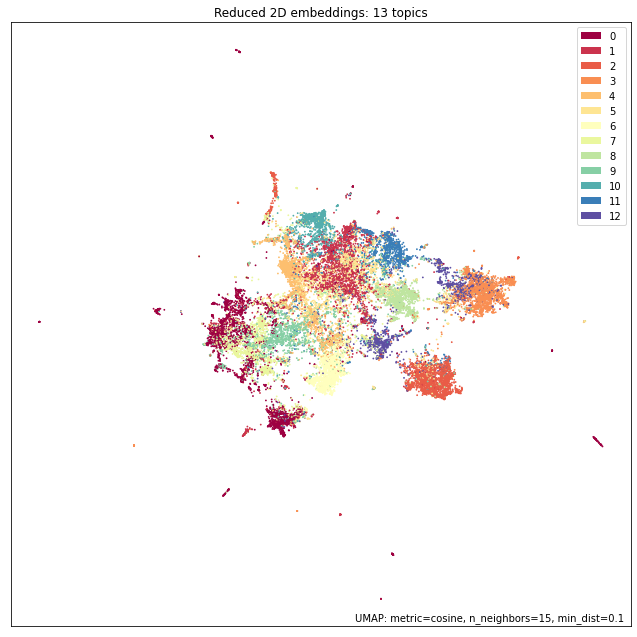

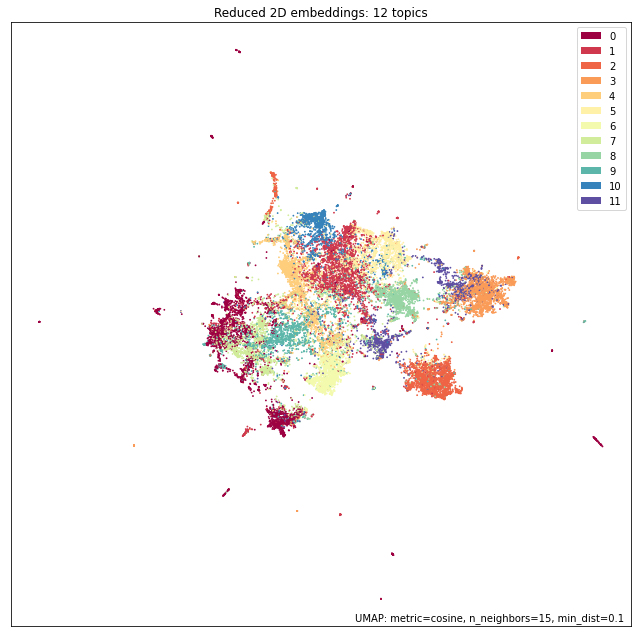

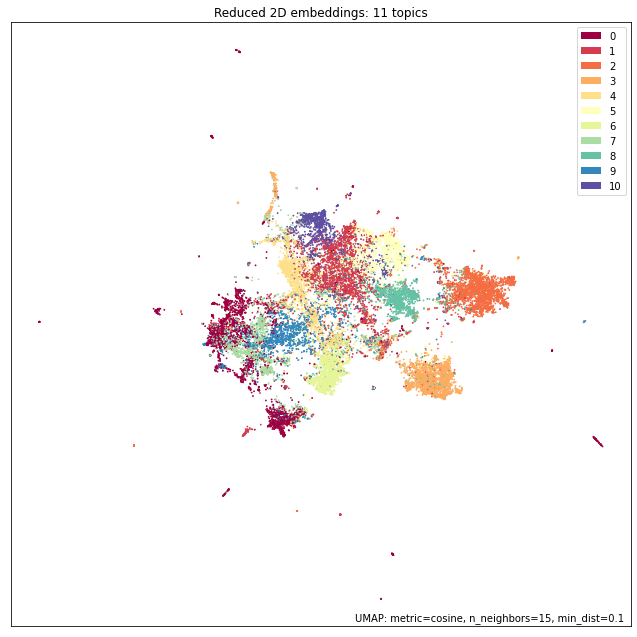

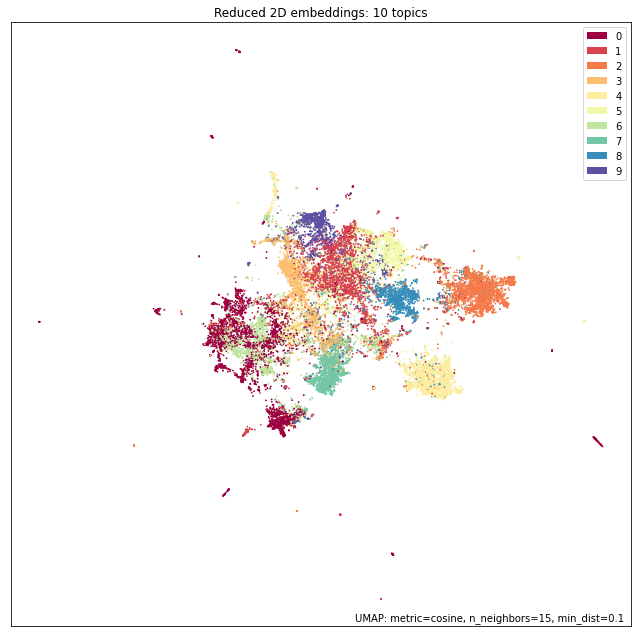

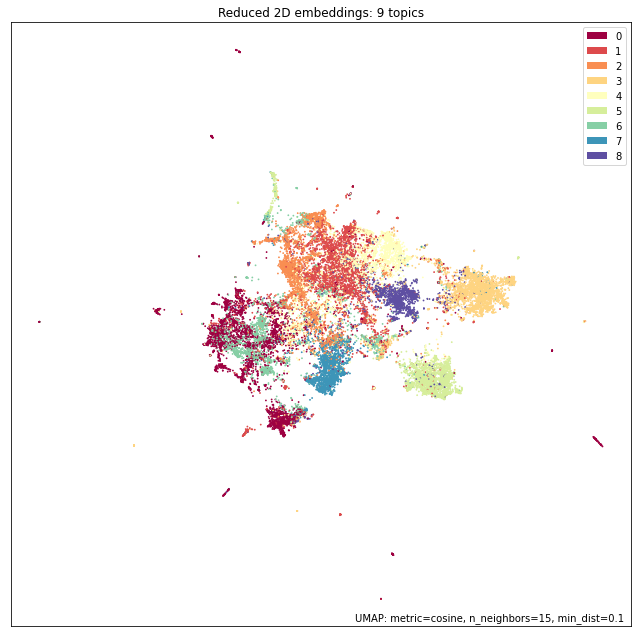

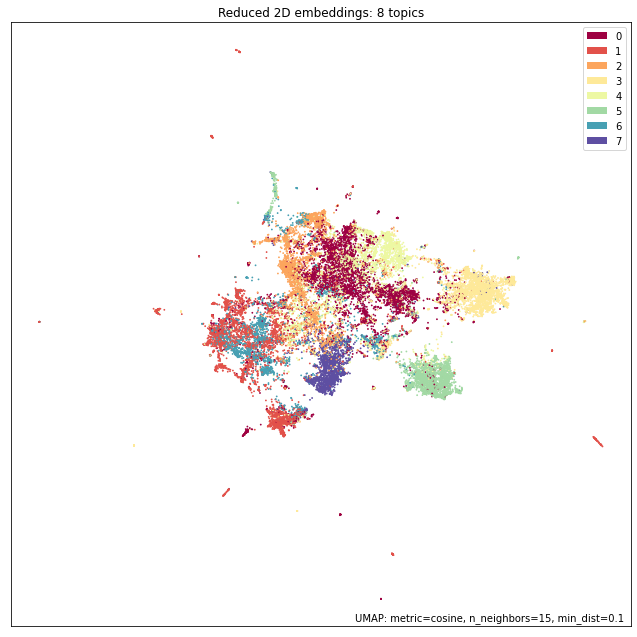

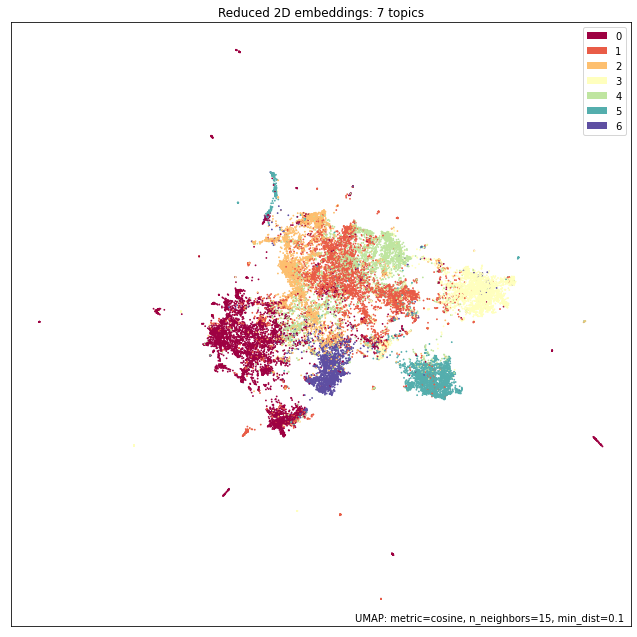

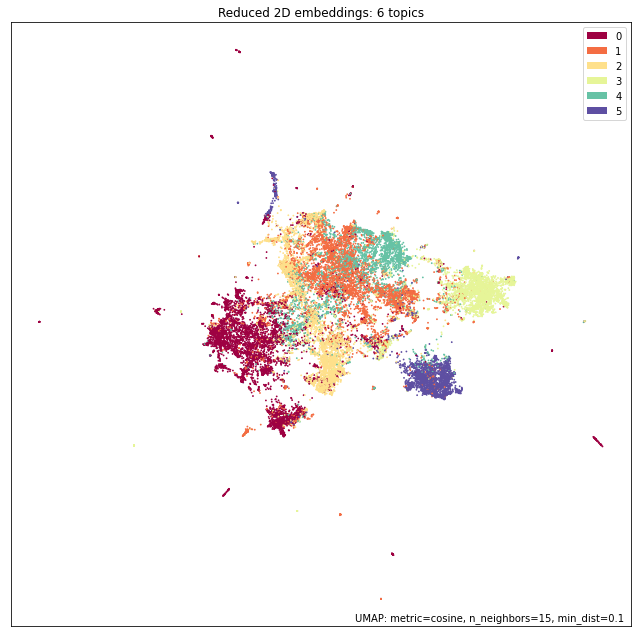

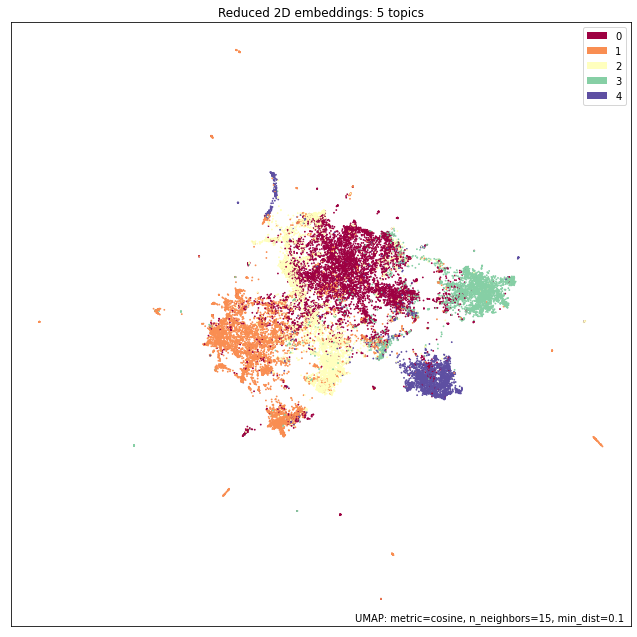

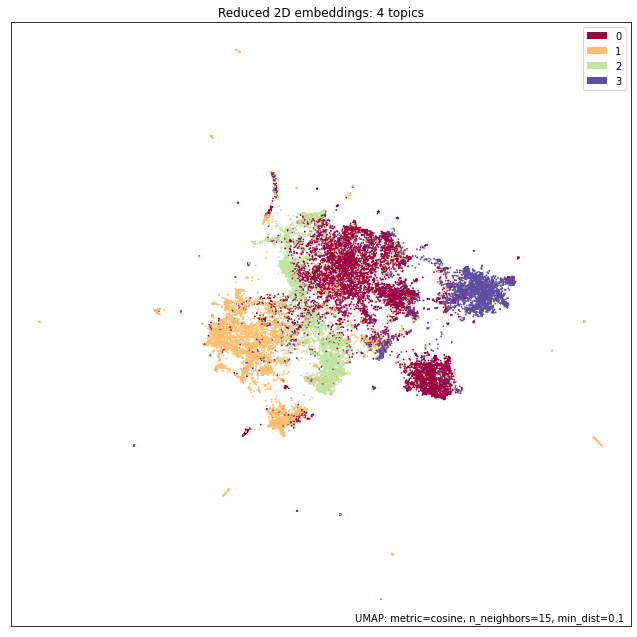

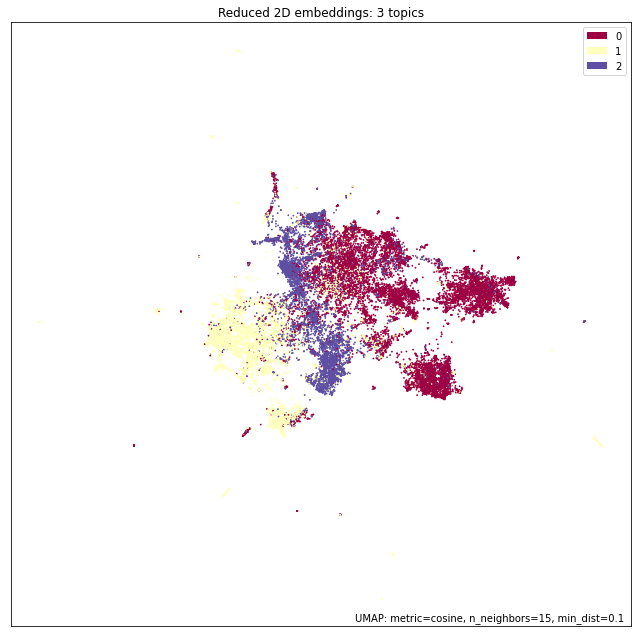

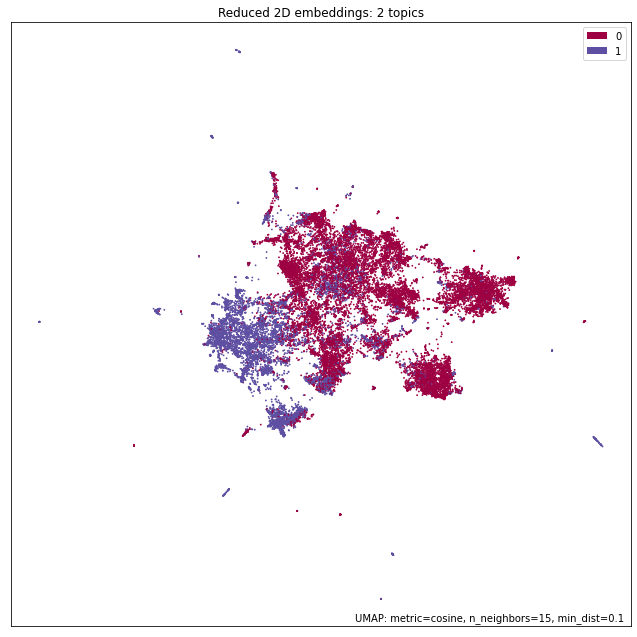

In [7]:
for num in range(20, 1, -1):
    generate_umap_projection(model, umap_model, num)

In [8]:
model.hierarchical_topic_reduction(20)

[[209,
  211,
  74,
  203,
  189,
  19,
  9,
  94,
  61,
  164,
  75,
  57,
  126,
  136,
  138,
  155,
  161,
  4],
 [170,
  134,
  169,
  71,
  101,
  7,
  39,
  195,
  208,
  31,
  115,
  68,
  26,
  128,
  98,
  160,
  183,
  118,
  109,
  15,
  180,
  156,
  30,
  72,
  113,
  69],
 [173, 70, 53, 143, 20, 84, 10, 11, 182, 28, 89, 36],
 [144,
  148,
  166,
  122,
  151,
  18,
  179,
  63,
  22,
  42,
  177,
  108,
  67,
  204,
  185,
  37,
  212,
  213,
  149,
  198,
  214,
  206,
  184,
  80,
  127,
  188,
  191,
  181,
  85],
 [125, 27, 202, 154, 158, 82, 103, 8],
 [200, 55, 12, 25, 47, 141, 146, 176, 207, 5],
 [117, 140, 168, 23, 87, 174, 35, 159, 76, 110, 153, 40],
 [106, 119, 186, 58, 193, 34, 124, 17],
 [91, 194, 62, 133, 44, 79, 92, 0],
 [107, 121, 16, 90, 33, 104, 111, 199, 114, 100, 175, 45],
 [46, 78, 86, 172, 2],
 [6, 64, 187, 43, 123, 29, 59, 41],
 [50, 150, 152, 171, 51, 132, 116, 130, 120, 157, 56],
 [97, 99, 147, 192, 197, 3],
 [60, 81, 165, 196, 210, 24],
 [162, 83,

In [15]:
reduced_topics = pd.DataFrame({
    "doc_id": model.document_ids,
    "text": model.documents,
    "doc_top": model.doc_top,
    "doc_dist": model.doc_dist,
    "doc_top_reduced": model.doc_top_reduced,
    "doc_dist_reduced": model.doc_dist_reduced
})

In [29]:
top_docs = reduced_topics.groupby("doc_top_reduced")["doc_dist_reduced"].nlargest(10).reset_index()

In [35]:
selected = pd.merge(
    top_docs.rename(columns={"level_1": "doc_id"}).drop("doc_dist_reduced", axis=1),
    reduced_topics,
    on=["doc_id", "doc_top_reduced"],
    how="left"
)

In [40]:
reduced_topics.to_excel("./../data/processed/htp-20-full.xlsx", index=False)
selected.drop(["doc_top", "doc_dist"], axis=1).to_excel("./../data/processed/htp-20-top-10-texts.xlsx", index=False)